# Fitting Data with a Neural Network Trained Using Batch Training

This notebook provides you with a complete code example that loads the data contained in the `data_reg_2d_nonlinear.csv` file, trains a two-layer neural network to fit them with batch training, and finally uses the trained network to predict the values of the data in the file `data_reg_2d_nonlinear_test.csv`.

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_nonlinear.csv")

## Implementing a Dense Neural Network

Implement the sigmoidal function ...

In [2]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [3]:
def dnn2_reg(wa, wb, x):
    """Two-layer dense neural network for classification."""
    return sigmoid(x @ wa) @ wb

... define the number of neurons in the first layer ...

In [4]:
num_neurons = 10

... randomly initialize its weights ...

In [5]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons)) # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1)) # Input weights layer 2.

... obtain its predictions for the input data ...

In [6]:
y_p = dnn2_reg(wa, wb, x)

... and plot its predictions.

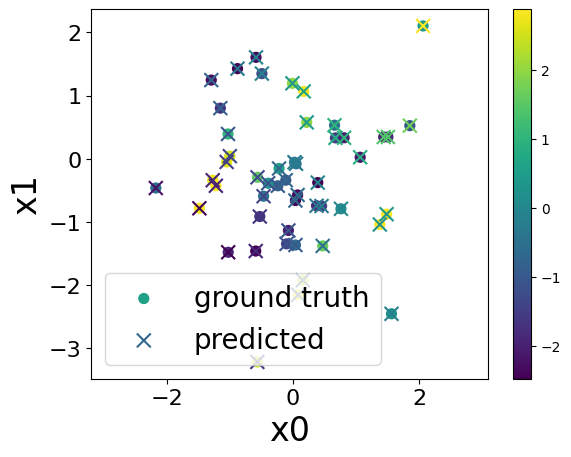

In [7]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Plotting the Predictions Versus Ground Truth Values

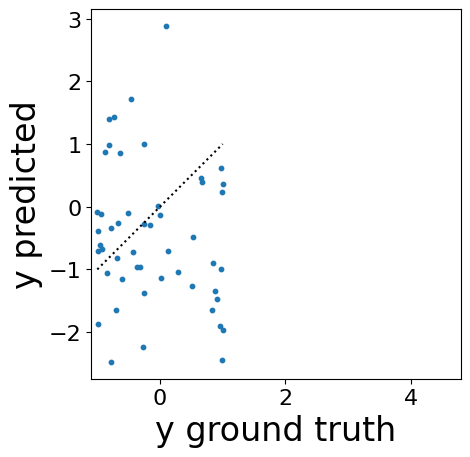

In [8]:
from plotting import plot_pred_vs_gt

plot_pred_vs_gt(y_gt, y_p=dnn2_reg(wa, wb, x))

## Training with Mini-Batches

Implement the first derivative of the sigmoid function ...

In [9]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm with mini-batches ...

In [10]:
from numpy import mean, reshape, sum, transpose, zeros
from numpy.random import permutation

num_samples = len(x)
num_batches = 10
batch_size = int(num_samples / num_batches)
num_epochs = 10 ** 4
eta = .1 # Learning rate.

mse_train = zeros((num_epochs,))

for epoch in range(num_epochs):
    # Permute samples.
    permuted_order_samples = permutation(num_samples)
    x_permuted = x[permuted_order_samples]
    y_gt_permuted = y_gt[permuted_order_samples]

    for batch_start in range(0, num_samples, batch_size):
        dwa = zeros(wa.shape) # Initialize weight increments layer 1.
        dwb = zeros(wb.shape) # Initialize weight increments layer 2.
        
        for selected in range(batch_start, batch_start + batch_size):
            x_selected = reshape(x_permuted[selected], (1, -1))
            y_gt_selected = reshape(y_gt_permuted[selected], (1, -1))
            
            # Detailed neural network calculation.
            x_selected_a = x_selected # Input layer 1.
            p_a = x_selected_a @ wa # Activation potential layer 1.
            y_selected_a = sigmoid(p_a) # Output layer 1.

            x_selected_b = y_selected_a # Input layer 2.
            p_b = x_selected_b @ wb # Activation potential layer 2.
            y_selected_b = p_b # Output neuron layer 2 (output neuron).

            y_p_selected = y_selected_b
    
            # Update weights.
            error = y_p_selected - y_gt_selected
    
            delta_b = error * 1
            dwb -= eta * delta_b * transpose(x_selected_b)

            delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
            dwa -= eta * delta_a * transpose(x_selected_a)
    
        wa += dwa / batch_size # Update weights layer 1.
        wb += dwb / batch_size # Update weights layer 2.
        
    y_p = dnn2_reg(wa, wb, x)
    mse_train[epoch] = mean((y_p - y_gt) ** 2)
    
    print(f"epoch={epoch} MSE = {mse_train[epoch]:.4f}")

epoch=0 MSE = 0.9708
epoch=1 MSE = 0.6280
epoch=2 MSE = 0.5180
epoch=3 MSE = 0.4692
epoch=4 MSE = 0.4599
epoch=5 MSE = 0.4368
epoch=6 MSE = 0.4333
epoch=7 MSE = 0.4170
epoch=8 MSE = 0.4092
epoch=9 MSE = 0.4098
epoch=10 MSE = 0.3957
epoch=11 MSE = 0.3931
epoch=12 MSE = 0.3825
epoch=13 MSE = 0.3758
epoch=14 MSE = 0.3696
epoch=15 MSE = 0.3645
epoch=16 MSE = 0.3599
epoch=17 MSE = 0.3551
epoch=18 MSE = 0.3486
epoch=19 MSE = 0.3483
epoch=20 MSE = 0.3399
epoch=21 MSE = 0.3342
epoch=22 MSE = 0.3328
epoch=23 MSE = 0.3276
epoch=24 MSE = 0.3222
epoch=25 MSE = 0.3168
epoch=26 MSE = 0.3167
epoch=27 MSE = 0.3119
epoch=28 MSE = 0.3040
epoch=29 MSE = 0.3031
epoch=30 MSE = 0.3015
epoch=31 MSE = 0.2930
epoch=32 MSE = 0.2900
epoch=33 MSE = 0.2849
epoch=34 MSE = 0.2819
epoch=35 MSE = 0.2826
epoch=36 MSE = 0.2842
epoch=37 MSE = 0.2701
epoch=38 MSE = 0.2696
epoch=39 MSE = 0.2628
epoch=40 MSE = 0.2595
epoch=41 MSE = 0.2587
epoch=42 MSE = 0.2548
epoch=43 MSE = 0.2811
epoch=44 MSE = 0.2503
epoch=45 MSE = 0.243

... and plot its predictions ...

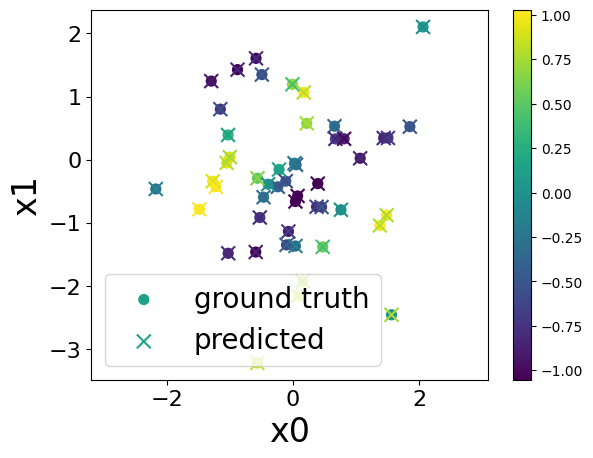

In [11]:
plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

... its predictions versus ground truth ...

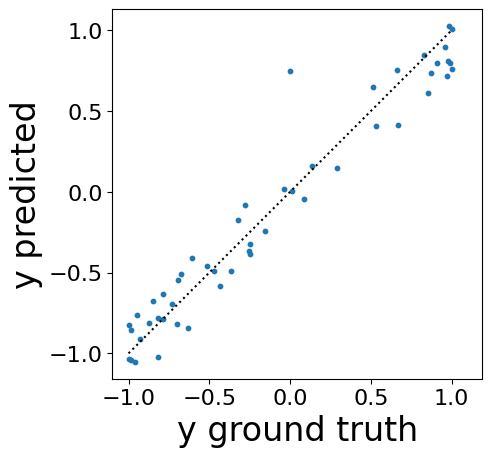

In [12]:
plot_pred_vs_gt(y_gt, y_p=dnn2_reg(wa, wb, x))

... and the training metrics.

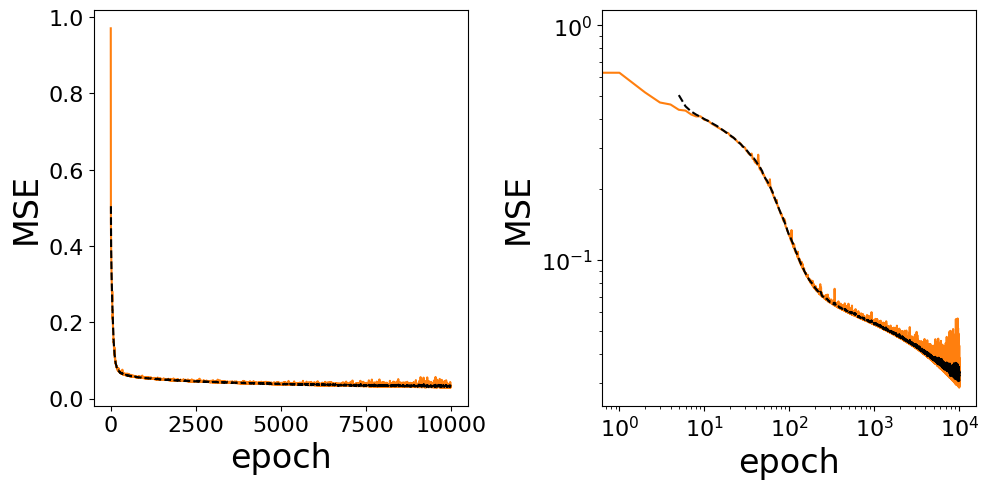

In [13]:
from plotting import plot_mse

plot_mse(mse_train, smooth=11)